In [1]:
# This defines a function that plots the X for three classes 
# and updates the plot
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import collections
%matplotlib inline

def live_plot(X, y, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.scatter(X[y==0,0], X[y==0,1], color='red')
    plt.scatter(X[y==1,0], X[y==1,1], color='blue')
    plt.title(title)
    plt.show()

In [2]:
# Import pytorch - 
# If you are in an Anaconda environment, you can use: 
# conda install pytorch torchvision -c pytorch
import numpy as np
import torch
import pandas as pd
from sklearn.datasets import make_blobs, make_circles

In [3]:
# Make a circle data set 
X, y = make_circles(random_state=0, noise=0.02)

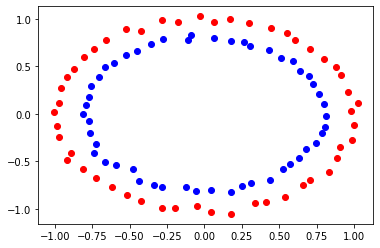

In [4]:
# And plot it. 
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [5]:
# Now define a network with one hidden layer
# with 40 units and logistic non-linearity

class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes, max_iter=1000, lr=1e-3):
        
        super().__init__()
        
        # Neural Network Architecture: 40 hidden units 
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=20*num_classes)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=20*num_classes, out_features=num_classes)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

In [18]:
num_features = X.shape[1]
num_classes = 2
max_iter = 100000
model = NonLinearModel(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

Xt = torch.FloatTensor(X)
yt = torch.LongTensor(y)

for i in range(max_iter):
    optimizer.zero_grad()
    y_pred = model(Xt)
    loss = criterion(input=y_pred, target=yt)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        with torch.no_grad():
            live_plot(y_pred.detach().numpy(), y, title=f"Loss at epoch {i}: {loss.item():.4f}")

KeyboardInterrupt: 

In [14]:
y_pred.shape

torch.Size([100, 2])

In [19]:
with torch.no_grad():
    y_pred = model.forward(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")

Classifier Accuracy: 85.0%


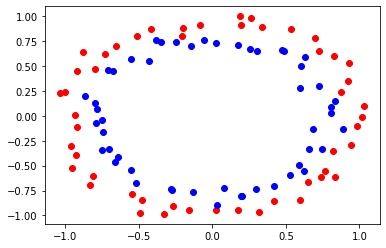

In [16]:
# Get acuracy on noisier test set 
X, y = make_circles(random_state=1, noise=0.06)
plt.scatter(X[y==0].T[0], X[y==0].T[1], color='red')
plt.scatter(X[y==1].T[0], X[y==1].T[1], color='blue')
plt.scatter(X[y==2].T[0], X[y==2].T[1], color='green')
plt.show()

In [17]:
Xt = torch.Tensor(X)
with torch.no_grad():
    y_pred = model(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")

Classifier Accuracy: 97.0%
